In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment',  None)
data = pd.read_csv('train.csv')
sub = pd.read_csv('sample_submission.csv')

data['일자'] = pd.to_datetime(data['일자'], format='%Y%m%d')
data = data.rename(columns={'일자' : 'ds', '종가' : 'y'})
data

C:\Users\kweon\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,ds,종목코드,종목명,거래량,시가,고가,저가,y
0,2021-06-01,A060310,3S,166690,2890,2970,2885,2920
1,2021-06-01,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,2021-06-01,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,2021-06-01,A054620,APS,462544,14600,14950,13800,14950
4,2021-06-01,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,2023-05-30,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,2023-05-30,A000540,흥국화재,50218,3250,3255,3195,3215
987997,2023-05-30,A003280,흥아해운,130664,1344,1395,1340,1370
987998,2023-05-30,A037440,희림,141932,9170,9260,9170,9200


09:27:53 - cmdstanpy - INFO - Chain [1] start processing
09:27:53 - cmdstanpy - INFO - Chain [1] done processing


<Axes: >

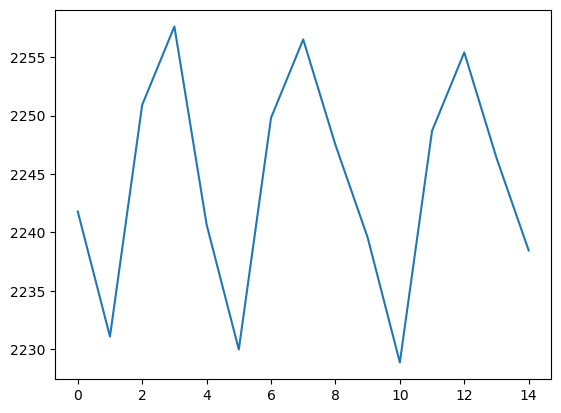

In [10]:
dum = data[data['종목코드'] == 'A060310']

from prophet import Prophet
from pandas.tseries.offsets import CustomBusinessDay
model = Prophet(
    seasonality_mode = 'additive',
    seasonality_prior_scale = 10
)

model.fit(dum)
bday = CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')
future = pd.DataFrame()
future['ds'] = pd.date_range(start='2023-05-31', periods=16, freq=bday)
future = future[future['ds'] != '2023-06-06']
forecast = model.predict(future)
forecast['yhat'].plot()

<Axes: >

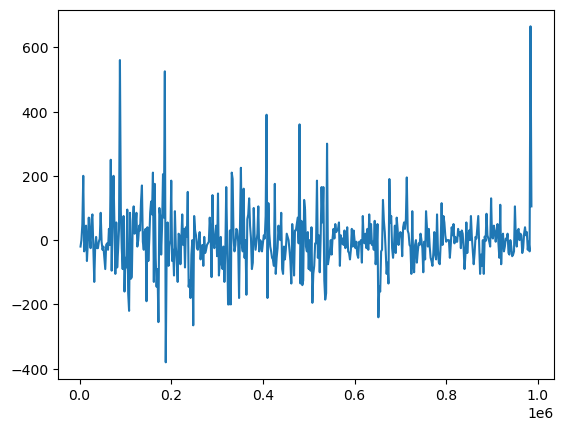

In [12]:
dum['y'].diff().plot()

In [17]:
data['종목코드'].unique()

array(['A060310', 'A095570', 'A006840', ..., 'A003280', 'A037440',
       'A238490'], dtype=object)

In [18]:
from prophet import Prophet
from pandas.tseries.offsets import CustomBusinessDay


def ph_train(df):
    pred = pd.DataFrame()
    pred['y'] = None
    pred['종목코드'] = None

    pred_y = []
    pred_code = []
    for code in df['종목코드'].unique():
        d = df[df['종목코드'] == code].reset_index().drop(['index', '종목코드', '종목명'], axis=1).sort_values('ds')
        
        model = Prophet()
        # model.add_regressor('거래량')
        # model.add_regressor('고가')
        # model.add_regressor('시가')
        # model.add_regressor('저가')
        model.fit(d)
        bday = CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')
        future = pd.DataFrame()
        future['ds'] = pd.date_range(start='2023-05-31', periods=16, freq=bday)
        future = future[future['ds'] != '2023-06-06']
        
        forecast = model.predict(future)
        pred_y.append(forecast['yhat'].diff().sum())
        pred_code.append(code)
    
    pred['y'] = pred_y
    pred['종목코드'] = pred_code
    
    return pred

pred = ph_train(data)

01:33:16 - cmdstanpy - INFO - Chain [1] start processing
01:33:16 - cmdstanpy - INFO - Chain [1] done processing
01:33:16 - cmdstanpy - INFO - Chain [1] start processing
01:33:17 - cmdstanpy - INFO - Chain [1] done processing
01:33:17 - cmdstanpy - INFO - Chain [1] start processing
01:33:17 - cmdstanpy - INFO - Chain [1] done processing
01:33:17 - cmdstanpy - INFO - Chain [1] start processing
01:33:17 - cmdstanpy - INFO - Chain [1] done processing
01:33:18 - cmdstanpy - INFO - Chain [1] start processing
01:33:18 - cmdstanpy - INFO - Chain [1] done processing
01:33:18 - cmdstanpy - INFO - Chain [1] start processing
01:33:18 - cmdstanpy - INFO - Chain [1] done processing
01:33:19 - cmdstanpy - INFO - Chain [1] start processing
01:33:19 - cmdstanpy - INFO - Chain [1] done processing
01:33:19 - cmdstanpy - INFO - Chain [1] start processing
01:33:19 - cmdstanpy - INFO - Chain [1] done processing
01:33:20 - cmdstanpy - INFO - Chain [1] start processing
01:33:20 - cmdstanpy - INFO - Chain [1]

In [2]:
from prophet import Prophet
from pandas.tseries.offsets import CustomBusinessDay
# diff 

def ph_train(df):
    pred = pd.DataFrame()
    pred['y'] = None
    pred['종목코드'] = None

    pred_y = []
    pred_code = []
    for code in df['종목코드'].unique():
        d = df[df['종목코드'] == code].reset_index().drop(['index', '종목코드', '종목명'], axis=1).sort_values('ds')
        d['y'] = d['y'].diff()
        
        model = Prophet()
        # model.add_regressor('거래량')
        # model.add_regressor('고가')
        # model.add_regressor('시가')
        # model.add_regressor('저가')
        model.fit(d)
        bday = CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')
        future = pd.DataFrame()
        future['ds'] = pd.date_range(start='2023-05-31', periods=15, freq=bday)
        future = future[future['ds'] != '2023-06-06']
        
        forecast = model.predict(future)
        pred_y.append(forecast['yhat'].sum())
        pred_code.append(code)
    
    pred['y'] = pred_y
    pred['종목코드'] = pred_code
    
    return pred

pred = ph_train(data)

08:57:49 - cmdstanpy - INFO - Chain [1] start processing
08:57:49 - cmdstanpy - INFO - Chain [1] done processing
08:57:49 - cmdstanpy - INFO - Chain [1] start processing
08:57:49 - cmdstanpy - INFO - Chain [1] done processing
08:57:49 - cmdstanpy - INFO - Chain [1] start processing
08:57:49 - cmdstanpy - INFO - Chain [1] done processing
08:57:49 - cmdstanpy - INFO - Chain [1] start processing
08:57:49 - cmdstanpy - INFO - Chain [1] done processing
08:57:50 - cmdstanpy - INFO - Chain [1] start processing
08:57:50 - cmdstanpy - INFO - Chain [1] done processing
08:57:50 - cmdstanpy - INFO - Chain [1] start processing
08:57:50 - cmdstanpy - INFO - Chain [1] done processing
08:57:50 - cmdstanpy - INFO - Chain [1] start processing
08:57:50 - cmdstanpy - INFO - Chain [1] done processing
08:57:50 - cmdstanpy - INFO - Chain [1] start processing
08:57:50 - cmdstanpy - INFO - Chain [1] done processing
08:57:51 - cmdstanpy - INFO - Chain [1] start processing
08:57:51 - cmdstanpy - INFO - Chain [1]

In [2]:
from prophet import Prophet
from pandas.tseries.offsets import CustomBusinessDay
# diff 

def ph_train(df):
    pred = pd.DataFrame()
    pred['y'] = None
    pred['종목코드'] = None

    pred_y = []
    pred_code = []
    for code in df['종목코드'].unique():
        d = df[df['종목코드'] == code].reset_index().drop(['index', '종목코드', '종목명'], axis=1).sort_values('ds')
        d['y'] = d['y'].diff()
        
        
        model = Prophet(growth = 'linear',
                                seasonality_mode = 'multiplicative',
                                yearly_seasonality = 'auto',
                                weekly_seasonality = 'auto',
                                daily_seasonality = 'auto',
                                holidays = None,
                                changepoint_prior_scale = 0.01
                            )
        # model.add_regressor('거래량')
        # model.add_regressor('고가')
        # model.add_regressor('시가')
        # model.add_regressor('저가')
        model.fit(d)
        bday = CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')
        future = pd.DataFrame()
        future['ds'] = pd.date_range(start='2023-05-31', periods=15, freq=bday)
        future = future[future['ds'] != '2023-06-06']
        
        forecast = model.predict(future)
        pred_y.append(forecast['yhat'].sum())
        pred_code.append(code)
    
    pred['y'] = pred_y
    pred['종목코드'] = pred_code
    
    return pred

pred = ph_train(data)


09:29:35 - cmdstanpy - INFO - Chain [1] start processing
09:29:35 - cmdstanpy - INFO - Chain [1] done processing
09:29:35 - cmdstanpy - INFO - Chain [1] start processing
09:29:35 - cmdstanpy - INFO - Chain [1] done processing
09:29:35 - cmdstanpy - INFO - Chain [1] start processing
09:29:35 - cmdstanpy - INFO - Chain [1] done processing
09:29:35 - cmdstanpy - INFO - Chain [1] start processing
09:29:35 - cmdstanpy - INFO - Chain [1] done processing
09:29:36 - cmdstanpy - INFO - Chain [1] start processing
09:29:36 - cmdstanpy - INFO - Chain [1] done processing
09:29:36 - cmdstanpy - INFO - Chain [1] start processing
09:29:36 - cmdstanpy - INFO - Chain [1] done processing
09:29:36 - cmdstanpy - INFO - Chain [1] start processing
09:29:36 - cmdstanpy - INFO - Chain [1] done processing
09:29:36 - cmdstanpy - INFO - Chain [1] start processing
09:29:36 - cmdstanpy - INFO - Chain [1] done processing
09:29:36 - cmdstanpy - INFO - Chain [1] start processing
09:29:36 - cmdstanpy - INFO - Chain [1]

In [3]:
sub

,종목코드,순위
0,A000020,1
1,A000040,2
2,A000050,3
3,A000070,4
4,A000080,5
...,...,...
1995,A375500,1996
1996,A378850,1997
1997,A383220,1998
1998,A383310,1999


In [3]:
pred = pred.sort_values('y', ascending=False)
save_pred = pred.reset_index().drop(['index', 'y'], axis=1).reset_index().rename(columns={'index' : '순위'})
# save_pred.reindex(columns=['종목코드', '순위']).to_csv('prophet_simple_230709.csv', index=False)

In [4]:
merged = pd.merge(sub, save_pred, on='종목코드').drop('순위_x', axis=1).rename(columns={'순위_y' : '순위'})
merged['순위'] = merged['순위'] + 1
merged.to_csv('prophet_simple_ydiff2_230710.csv', index=False)